Computaton of group delay resulted from gain control as in Berry's model
by using a wave packet

adpated from:

https://dspillustrations.com/pages/posts/misc/group-delay-and-phase-delay-example.html


Sept 13, 2021 Created by CKC

In [305]:
import numpy as np
import math
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

In [306]:
from scipy.fftpack import fft, fftfreq
def FFT_quick(data, dt, center_data = False, center_faxis = True):
    if center_data:
        xft=fft(data-np.mean(data))
    else:
        xft=fft(data)
    xft_nor=xft/len(xft)
    freq=fftfreq(len(data), d=dt)

    if center_faxis:
        xft_nor = np.append( xft_nor[np.argmin(freq):],xft_nor[:np.argmin(freq)] )
        freq = np.append( freq[np.argmin(freq):], freq[:np.argmin(freq)] )
    return freq,xft_nor

In [307]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

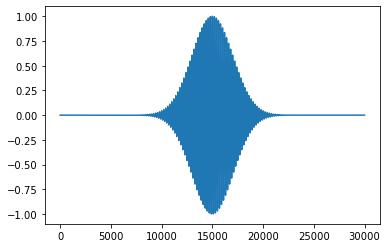

In [308]:
Tot = 30
dt = 0.001
# Fs = 100
f0 = 5   # The resonant frequency of the circuit

tAxis = np.arange(0, Tot, dt)
sigma = 2
envelope = np.exp( -0.5*((tAxis-Tot/2)/sigma)**2 )
sinWave = np.cos(2*np.pi*f0*tAxis)
packetWave = envelope * sinWave
plt.plot(packetWave)

(0.0, 1.0)

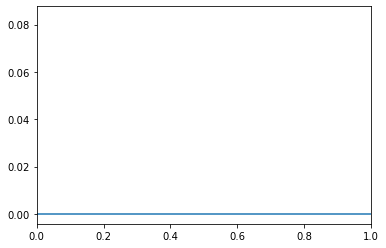

In [309]:
fAxis,FT_packetWave=FFT_quick(packetWave, dt)
plt.plot(fAxis, np.abs(FT_packetWave))
plt.xlim(0,1)

In [310]:
#Gain control function
def gain_func(v):
    try: # if v is an ndarray
        v[v < 0] = 0
    except: # if v is a variable
        if v < 0 : return 1
    return 1/(1+v**4)
    
def AddGainControl(r, B, tau):
    decay = np.exp(-(np.arange(0,1,dt)+dt)/tau)
    # plt.plot(np.arange(0,1,dt)+dt,decay)

    output = np.zeros_like(r)
    gain = np.zeros_like(r)
    for i in np.arange(1,r.shape[0]):
        gain[i] = gain_func(np.sum(B*decay[:min(i,len(decay))]*output[i:max(0, i-len(decay)):-1]*dt) )
        opi = gain[i]*r[i]
        output[i] = opi
    # output[output<0] = 0
    return  output, gain

In [311]:
# x = packetWave.copy()
x = sinWave.copy()

y = x.copy() # output signal
gain =np.ones_like(x)
delay = int(1250)
B = 5
for i in range(delay,len(x)):
    gain[i] = 1/(1+B*y[i-delay]**2)
    y[i]= gain[i]*x[i]

# B = 80
# tau = 10/f0
# y, gain = AddGainControl(x, B, tau)
# plt.plot(gain)

(14500.0, 15500.0)

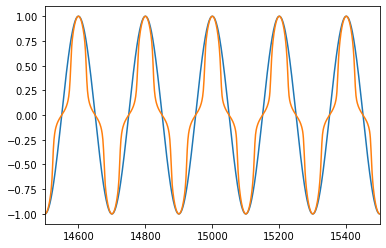

In [312]:
plt.plot(x)
plt.plot(y)
# plt.plot(gain)
plt.xlim(10000, 20000)
plt.xlim(14500, 15500)

(0.0, 10.0)

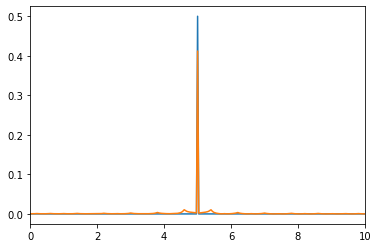

In [313]:
fAxis,FT_x=FFT_quick(x, dt)
fAxis,FT_y=FFT_quick(y, dt)
plt.plot(fAxis, np.abs(FT_x))
plt.plot(fAxis, np.abs(FT_y))
plt.xlim(0, 10)

In [314]:
H = FT_y/FT_x
G = np.abs(H)
Phi = np.angle(H)
delta = -angular_gradient(Phi)/np.mean(np.diff(fAxis))
PhaseDelay = -Phi/fAxis

C:\Users\hydro_leo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(0.0, 10.0)

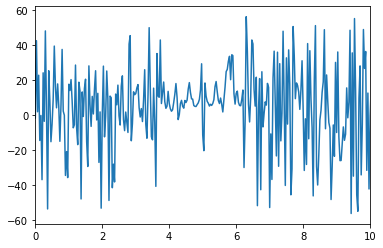

In [315]:
# plt.plot(fAxis, Phi)
plt.plot(fAxis, delta)
# plt.plot(fAxis, G)
# plt.plot(fAxis, PhaseDelay )
plt.xlim(0,10)

In [316]:
delta[np.argmin(np.abs(fAxis-f0))], PhaseDelay[np.argmin(np.abs(fAxis-f0))]

(-11.356582387108327, 0.000314654426017292)